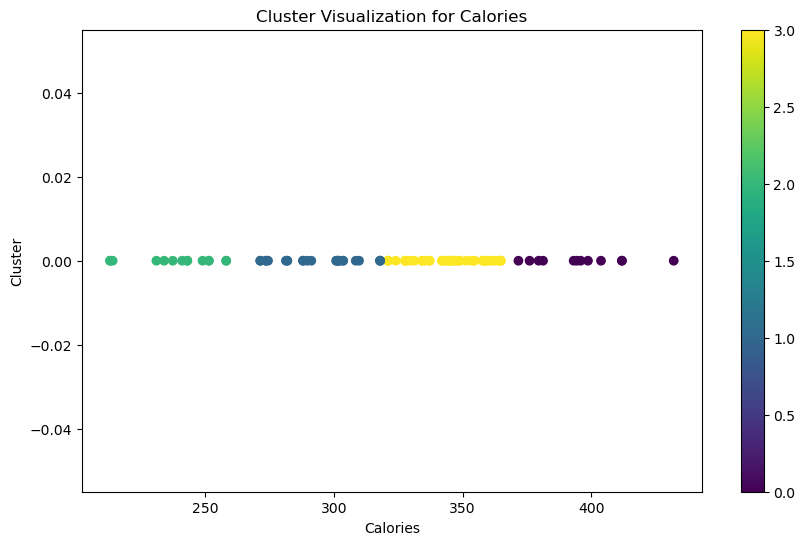

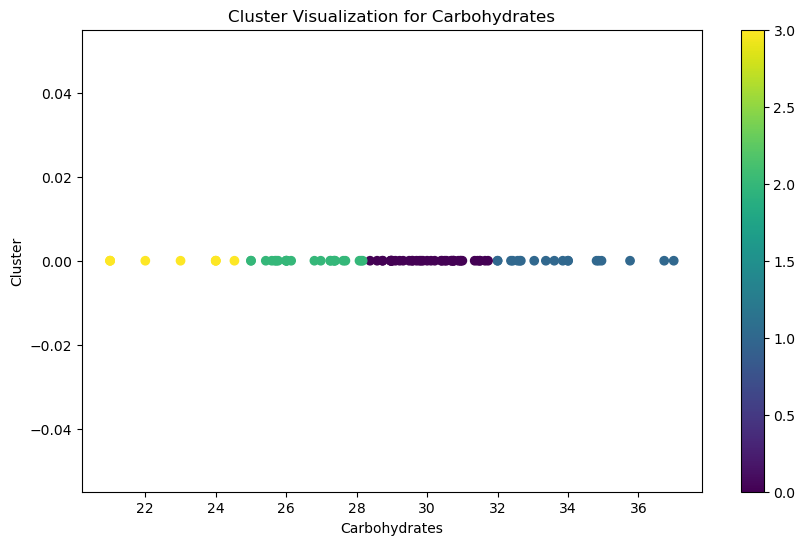

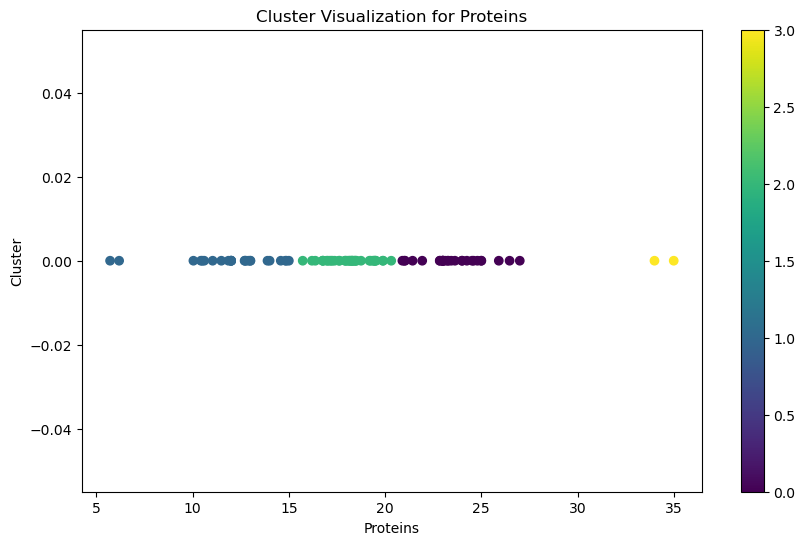

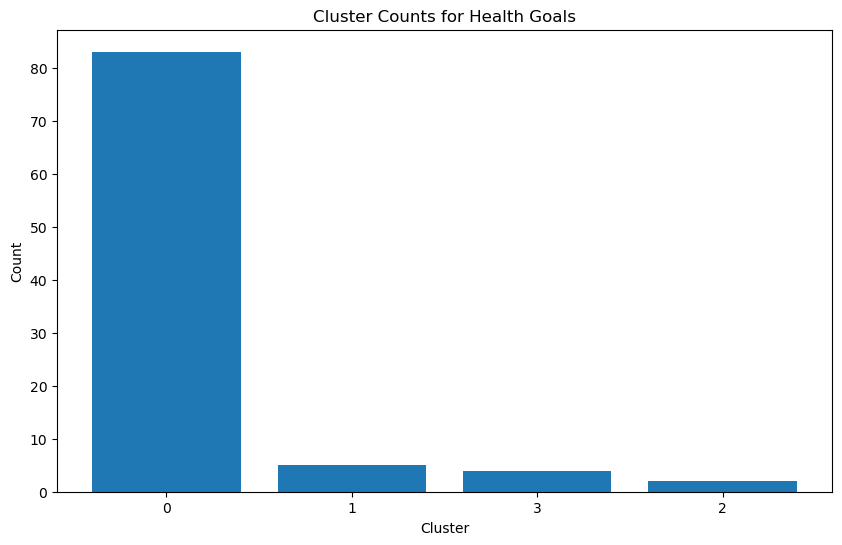

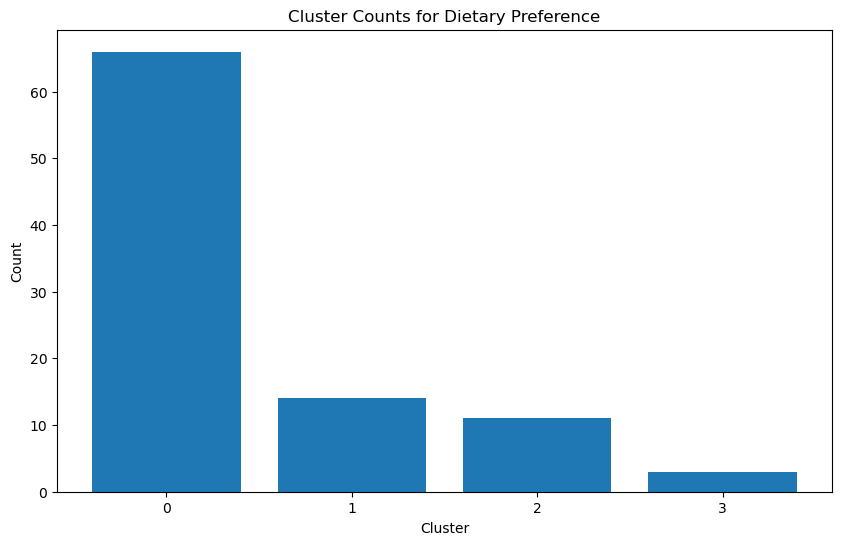

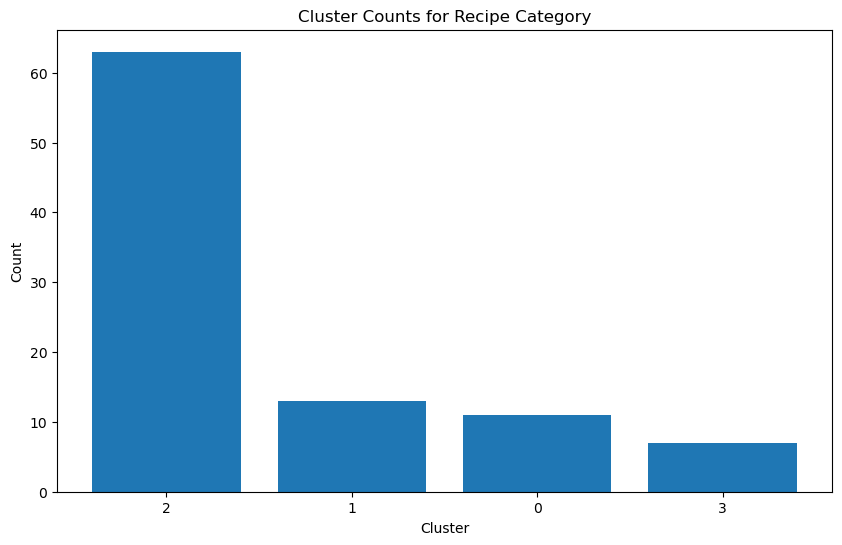

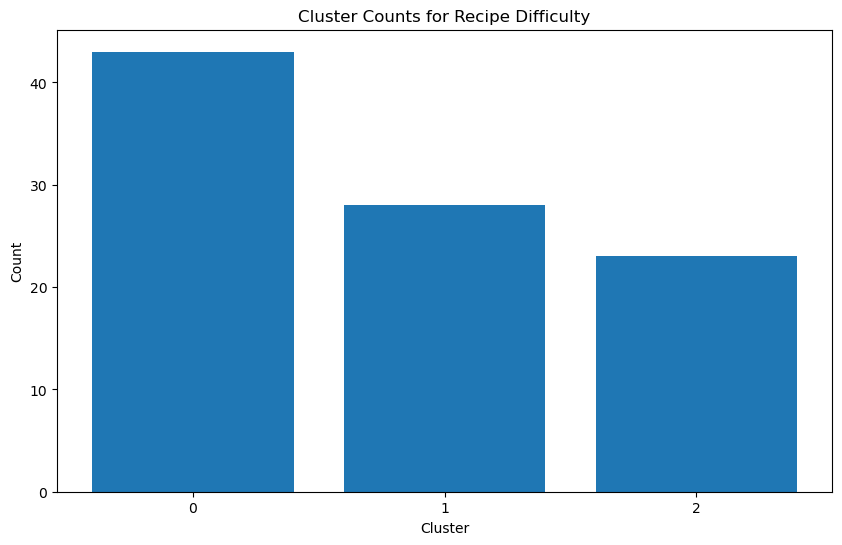


Counts for Calories_Cluster:
3    44
1    24
2    14
0    12
Name: Calories_Cluster, dtype: int64

Counts for Carbohydrates_Cluster:
0    42
2    24
1    19
3     9
Name: Carbohydrates_Cluster, dtype: int64

Counts for Proteins_Cluster:
2    39
0    28
1    25
3     2
Name: Proteins_Cluster, dtype: int64

Counts for Health Goals_Cluster:
0    83
1     5
3     4
2     2
Name: Health Goals_Cluster, dtype: int64

Counts for Dietary Preference_Cluster:
0    66
1    14
2    11
3     3
Name: Dietary Preference_Cluster, dtype: int64

Counts for Recipe Category_Cluster:
2    63
1    13
0    11
3     7
Name: Recipe Category_Cluster, dtype: int64

Counts for Recipe Difficulty_Cluster:
0    43
1    28
2    23
Name: Recipe Difficulty_Cluster, dtype: int64
Recipes in each cluster for each feature:
                     Cluster                                                                                                                                                                               

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Load the dataset
data = pd.read_csv("updated_cleaned_recipe_dataset.csv")

# Define the feature columns for clustering
numerical_features = ['Calories', 'Carbohydrates', 'Proteins']
categorical_features = ['Health Goals', 'Dietary Preference', 'Recipe Category', 'Recipe Difficulty']

# Standard Scaler for numerical data
scaler = StandardScaler()

# Set the number of clusters
k = 4  

# Clustering for each numerical feature separately
for feature in numerical_features:
    # Standardize the numerical feature
    scaled_numerical_data = scaler.fit_transform(data[[feature]])

    # Cluster the numerical data
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_numerical_data)

    # Visualize the clusters for the current numerical feature
    plt.figure(figsize=(10, 6))
    plt.scatter(data[feature], [0] * len(data), c=cluster_labels, cmap='viridis', marker='o')
    plt.title(f'Cluster Visualization for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cluster')
    plt.colorbar()
    plt.show()

    # Assign cluster labels to the original data
    data[f'{feature}_Cluster'] = cluster_labels

# Handling categorical features
for feature in categorical_features:
    # If categorical, get dummies (one-hot encode)
    encoded_feature = pd.get_dummies(data[feature])
    
    # Set the number of clusters to 3 for recipe difficulty
    if feature == 'Recipe Difficulty':
        k_categorical = 3
    else:
        k_categorical = k
    
    # Clustering on encoded categorical data
    kmeans_categorical = KMeans(n_clusters=k_categorical, n_init=10, random_state=42)
    cluster_labels_categorical = kmeans_categorical.fit_predict(encoded_feature.values)
    
    # Bar plot for categorical features
    cluster_counts = pd.value_counts(cluster_labels_categorical)
    plt.figure(figsize=(10, 6))
    plt.bar(x=range(len(cluster_counts)), height=cluster_counts, tick_label=cluster_counts.index)
    plt.title(f'Cluster Counts for {feature}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.show()
    
    # Assigning cluster labels to the original data for each categorical feature
    data[feature + '_Cluster'] = cluster_labels_categorical


# Specify your output file path
#output_file_path = 'path_to_your_output_file.csv'  # Update this path to your desired output file location
#data.to_csv(output_file_path, index=False)

# Print out the count of recipes in each cluster for each feature
for feature in numerical_features + categorical_features:
    cluster_col_name = feature + '_Cluster'
    print(f"\nCounts for {cluster_col_name}:")
    print(data[cluster_col_name].value_counts())


# Create an empty list to store dataframes
clustered_recipes_dfs = []

# Iterate through each feature and cluster
for feature in numerical_features + categorical_features:
    cluster_col_name = feature + '_Cluster'
    cluster_groups = data.groupby(cluster_col_name)
    for cluster_label, cluster_data in cluster_groups:
        # Create a dataframe for each cluster
        recipes_str = ', '.join(cluster_data['Recipe'])
        df = pd.DataFrame({'Cluster': [f'{feature} Cluster {cluster_label}'], 'Recipes': [recipes_str]})
        # Append the dataframe to the list
        clustered_recipes_dfs.append(df)

# Concatenate all dataframes in the list
clustered_recipes_table = pd.concat(clustered_recipes_dfs, ignore_index=True)

# Display the table
print("Recipes in each cluster for each feature:")
print(clustered_recipes_table.to_string(index=False))
